#Data Acquisition and Preparation
##Downloading and Unzipping the Dataset

The dataset animal-faces is downloaded from Kaggle using the Kaggle API.
The dataset is unzipped into the /content/animal_faces directory.

In [ ]:
!mkdir -p ~/.kaggle  # Create the .kaggle directory if it doesn't exist
!mv kaggle.json ~/.kaggle/  # Move the kaggle.json file to the .kaggle directory
!chmod 600 ~/.kaggle/kaggle.json  # Change the permissions of the file so it's readable

In [ ]:
!kaggle datasets download -d andrewmvd/animal-faces

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 99% 689M/696M [00:09<00:00, 91.6MB/s]
100% 696M/696M [00:09<00:00, 78.2MB/s]


In [ ]:
# Unzipping the dataset
!unzip animal-faces.zip -d /content/animal_faces

Streaming output truncated to the last 5000 lines.
  inflating: /content/animal_faces/afhq/train/wild/flickr_wild_001378.jpg  
  inflating: /content/animal_faces/afhq/train/wild/flickr_wild_001379.jpg  
  inflating: /content/animal_faces/afhq/train/wild/flickr_wild_001380.jpg  
  inflating: /content/animal_faces/afhq/train/wild/flickr_wild_001381.jpg  
  inflating: /content/animal_faces/afhq/train/wild/flickr_wild_001382.jpg  
  inflating: /content/animal_faces/afhq/train/wild/flickr_wild_001384.jpg  
  inflating: /content/animal_faces/afhq/train/wild/flickr_wild_001385.jpg  
  inflating: /content/animal_faces/afhq/train/wild/flickr_wild_001386.jpg  
  inflating: /content/animal_faces/afhq/train/wild/flickr_wild_001387.jpg  
  inflating: /content/animal_faces/afhq/train/wild/flickr_wild_001388.jpg  
  inflating: /content/animal_faces/afhq/train/wild/flickr_wild_001389.jpg  
  inflating: /content/animal_faces/afhq/train/wild/flickr_wild_001390.jpg  
  inflating: /content/animal_faces/af

##Importing Libraries
Essential libraries for building and evaluating the model are imported, including TensorFlow, Keras, and Matplotlib.

In [ ]:
#importing libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import numpy as np


#Data Loading and Preprocessing
##Defining Directory Paths
Paths for training (train_dir) and validation (val_dir) data directories are defined.

In [ ]:
#Defining the directory paths
train_dir = '/content/animal_faces/afhq/train'
val_dir = '/content/animal_faces/afhq/val'


##Setting Up Data Generators
ImageDataGenerators are set up for both training and validation data, with normalization (rescale=1./255), target size (150, 150), batch size 32, and categorical class mode.

In [ ]:
# Loading the dataset and prepare data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Verifying the class distribution
classes = train_generator.class_indices
print("Class indices:", classes)


Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Class indices: {'cat': 0, 'dog': 1, 'wild': 2}


#Model Building
##Defining the Model Architecture

A Convolutional Neural Network (CNN) model is defined using Keras Sequential API with convolutional, max pooling, flatten, and dense layers.

In [ ]:
#Building the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])



##Compiling the Model
The model is compiled with Adam optimizer, categorical cross-entropy loss function, and accuracy metric.

In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

#Model Training
##Training the Model

The model is trained using the training generator for 10 epochs with validation on the validation generator.

In [ ]:
# Training the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)


Epoch 1/10
458/458 [==============================] - 129s 267ms/step - loss: 0.8431 - accuracy: 0.6027 - val_loss: 0.9157 - val_accuracy: 0.6860
Epoch 2/10
458/458 [==============================] - 115s 250ms/step - loss: 0.5442 - accuracy: 0.7777 - val_loss: 0.3132 - val_accuracy: 0.8867
Epoch 3/10
458/458 [==============================] - 111s 242ms/step - loss: 0.4137 - accuracy: 0.8398 - val_loss: 0.2563 - val_accuracy: 0.9120
Epoch 4/10
458/458 [==============================] - 112s 244ms/step - loss: 0.3498 - accuracy: 0.8633 - val_loss: 0.1838 - val_accuracy: 0.9287
Epoch 5/10
458/458 [==============================] - 112s 244ms/step - loss: 0.3000 - accuracy: 0.8852 - val_loss: 0.2346 - val_accuracy: 0.9073
Epoch 6/10
458/458 [==============================] - 111s 242ms/step - loss: 0.2630 - accuracy: 0.9007 - val_loss: 0.3071 - val_accuracy: 0.9000
Epoch 7/10
458/458 [==============================] - 113s 245ms/step - loss: 0.2501 - accuracy: 0.9051 - val_loss: 0.1822 -

#Model Evaluation
##Evaluating the Model on Validation Data

The model is evaluated on the validation data generator to compute validation loss and accuracy.

In [ ]:
# Evaluating the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy}')

# Predicting the labels for the validation data
val_preds = model.predict(validation_generator)
val_preds = np.argmax(val_preds, axis=1)

# Getting the true labels
true_labels = validation_generator.classes

# Calculating precision and recall
precision = precision_score(true_labels, val_preds, average='macro')
recall = recall_score(true_labels, val_preds, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

47/47 [==============================] - 4s 83ms/step - loss: 0.1958 - accuracy: 0.9333
Validation Accuracy: 0.9333333373069763
47/47 [==============================] - 3s 70ms/step
Precision: 0.3048808026719673
Recall: 0.30333333333333334


In [ ]:
# Checking the distribution of classes in the validation set
from collections import Counter
print(Counter(true_labels))


Counter({0: 500, 1: 500, 2: 500})


47/47 [==============================] - 4s 75ms/step


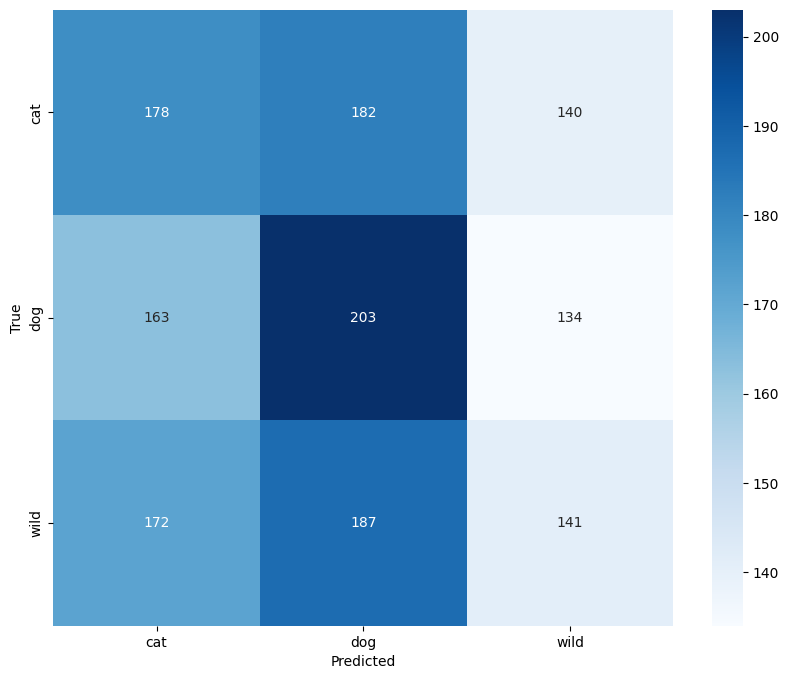

In [ ]:
# Predicting the labels for the validation data
val_preds = model.predict(validation_generator)
val_preds = np.argmax(val_preds, axis=1)

# Getting the true labels
true_labels = validation_generator.classes

# Plotting confusion matrix
cm = confusion_matrix(true_labels, val_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Comparison with Original Pretrained Model (VGG16)
##Training and Evaluating the Original Pretrained Model (VGG16)

In [ ]:
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

# Load VGG16 model pretrained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the model
original_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
original_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
original_history = original_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
458/458 [==============================] - 163s 323ms/step - loss: 0.9536 - accuracy: 0.5202 - val_loss: 0.7899 - val_accuracy: 0.6267
Epoch 2/10
458/458 [==============================] - 143s 312ms/step - loss: 0.5846 - accuracy: 0.7571 - val_loss: 0.2790 - val_accuracy: 0.9093
Epoch 3/10
458/458 [==============================] - 144s 314ms/step - loss: 0.2985 - accuracy: 0.8904 - val_loss: 0.2552 - val_accuracy: 0.9100
Epoch 4/10
458/458 [==============================] - 141s 308ms/step - loss: 0.2312 - accuracy: 0.9180 - val_loss: 0.1626 - val_accuracy: 0.9440
Epoch 5/10
458/458 [==============================] - 142s 310ms/step - loss: 0.1816 - accuracy: 0.9384 - val_loss: 0.2177 - val_accuracy: 0.9273
Epoch 6/10
458/458 [==============================] - 143s 311ms/step - loss: 0.1511 - accuracy: 0.9468 - val_loss: 0.0930 - val_accuracy: 0.9733
Epoch 7/10
458/458 [==============================] - 142s 

In [ ]:
# Evaluate the original model
original_loss, original_accuracy = original_model.evaluate(validation_generator)
print(f'Original Model Validation Accuracy: {original_accuracy}')

# Calculate precision and recall for the original model
original_val_preds = original_model.predict(validation_generator)
original_val_preds = np.argmax(original_val_preds, axis=1)
original_true_labels = validation_generator.classes

original_precision = precision_score(original_true_labels, original_val_preds, average='macro')
original_recall = recall_score(original_true_labels, original_val_preds, average='macro')



print(f'Original Model - Accuracy: {original_accuracy}, Precision: {original_precision}, Recall: {original_recall}')
print(f'Fine-Tuned Model - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')


47/47 [==============================] - 4s 93ms/step - loss: 0.0741 - accuracy: 0.9780
Original Model Validation Accuracy: 0.9779999852180481
47/47 [==============================] - 4s 81ms/step
Original Model - Accuracy: 0.9779999852180481, Precision: 0.33420204604161846, Recall: 0.334
Fine-Tuned Model - Accuracy: 0.9333333373069763, Precision: 0.3048808026719673, Recall: 0.30333333333333334


#Performance Visualization
##Plotting Training & Validation Accuracy
Training and validation accuracy values are plotted across epochs.

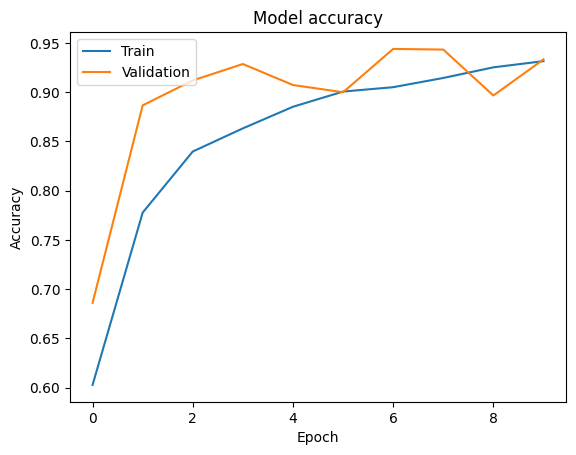

In [ ]:
#Plotting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##Plotting Training & Validation Loss
Training and validation loss values are plotted across epochs.

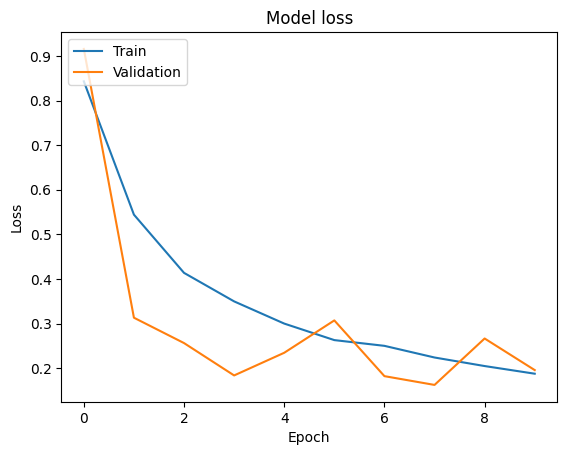

In [ ]:
#Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Model Saving and Loading
##Saving the Trained Model
The trained model is saved to disk as animal_face_classifier.h5.

In [ ]:
#Saving the model
model.save('animal_face_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Loading the Trained Model
The saved model (animal_face_classifier.h5) is loaded back into memory.

In [ ]:
#Loading the model
loaded_model = tf.keras.models.load_model('animal_face_classifier.h5')

#Model Performance Evaluation
##Predicting Labels and Generating Confusion Matrix
Predictions are made on the validation data, and a confusion matrix is plotted to visualize model performance.

47/47 [==============================] - 4s 85ms/step


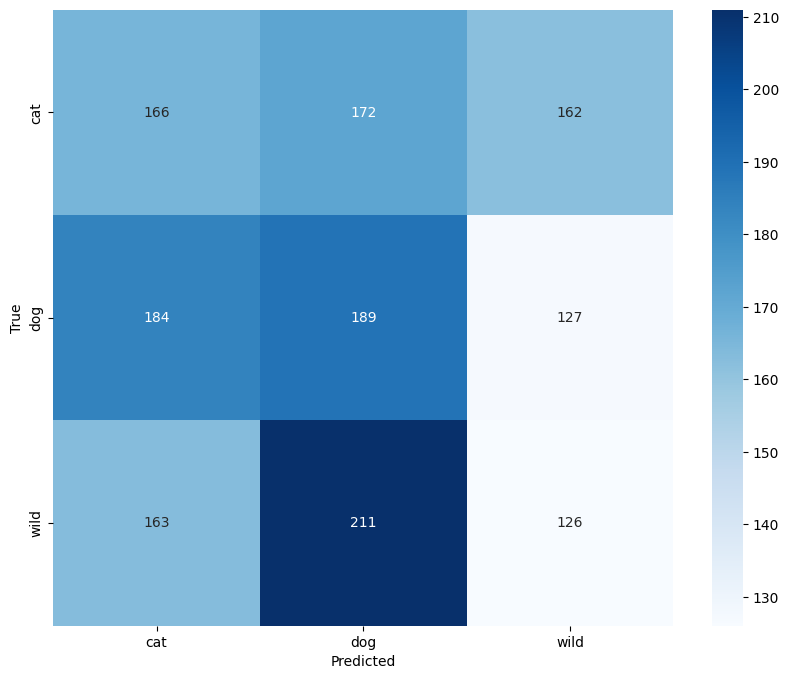

In [ ]:
#Predicting the labels for the validation data
val_preds = model.predict(validation_generator)
val_preds = np.argmax(val_preds, axis=1)

#Getting the true labels
true_labels = validation_generator.classes

#Plotting confusion matrix
cm = confusion_matrix(true_labels, val_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#Additional Visualizations
##Displaying Augmented Images
Augmented images from the training generator are displayed for visual inspection.

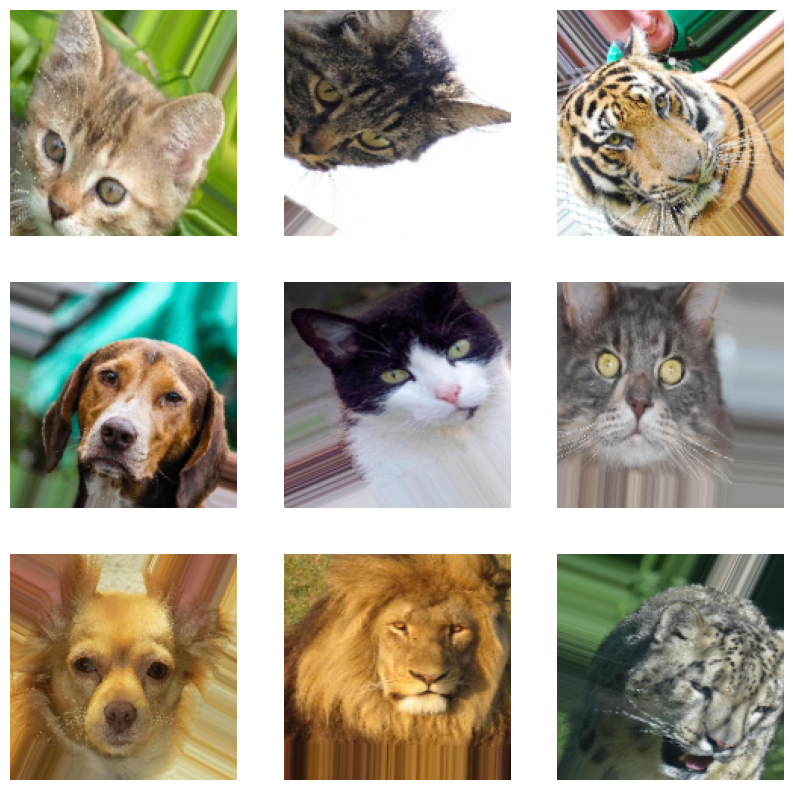

In [ ]:
# Displaying augmented images
for X_batch, Y_batch in train_generator:
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X_batch[i])
        plt.axis('off')
    plt.show()
    break


##Displaying Validation Images with Predicted Labels
Validation images along with their true and predicted labels are displayed for visual assessment.

1/1 [==============================] - 0s 83ms/step


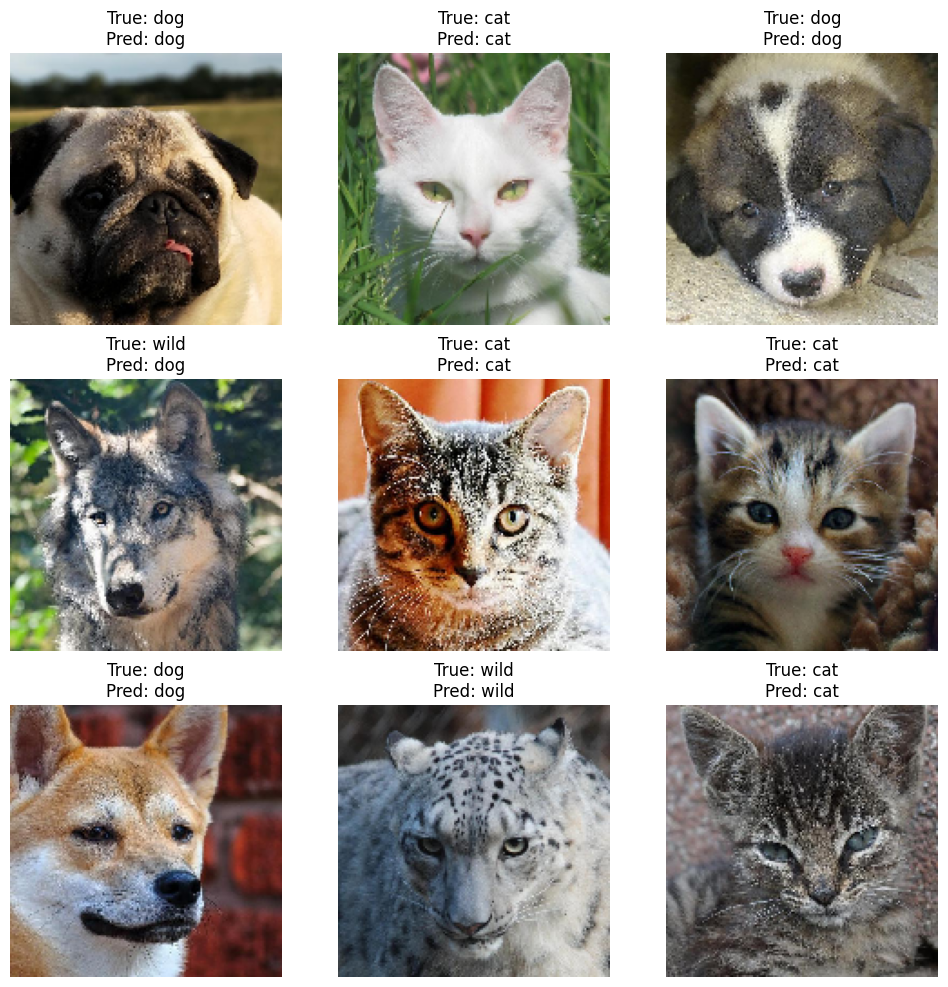

In [ ]:
# Getting a batch of validation images and their true labels
X_val, y_val = next(validation_generator)

# Predicting the labels for the batch
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plotting a few images with their predicted and true labels
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_val[i])
    true_label = list(validation_generator.class_indices.keys())[np.argmax(y_val[i])]
    pred_label = list(validation_generator.class_indices.keys())[y_pred_classes[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.show()
